### 1. Preprocess the dataset to convert it into a format that the algorithm can work with
### A. Perform pre-processing steps like Removing Punctuations, Numbers, and Special Characters, Stop Words in dataset. 

In [28]:
import pandas as pd
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.tokenize import word_tokenize
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('wordnet')
from collections import Counter
#!pip install WordCloud
#!pip install spacy
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tag import hmm
import spacy
#nltk.download('brown')
import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
file_path = r'C:\Users\Anurag\Desktop\Python-basics\tripadvisor_hotel_reviews_dataset1.csv'

In [3]:
df = pd.read_csv(file_path)
print(df)

                                                 Review  Rating
0     disappointed picked hotel having read rave rev...       2
1     fine place stay amsterdam wife week really fin...       4
2     home away home just returned weekend getaway s...       5
3     splendid hotel great location stayed seven bri...       5
4     cute cozy fantastic bb beautiful neighborhood ...       5
...                                                 ...     ...
9987  best kept secret 3rd time staying charm, not 5...       5
9988  great location price view hotel great quick pl...       4
9989  ok just looks nice modern outside, desk staff ...       2
9990  hotel theft ruined vacation hotel opened sept ...       1
9991  people talking, ca n't believe excellent ratin...       2

[9992 rows x 2 columns]


In [4]:
# Initialize the lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

### B. Perform normalization by using Stemming or Lemmatization

In [5]:
# Function to preprocess text
def preprocess_text(text):
    # Remove punctuations, numbers, and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    text = text.lower()
    
    # Remove stop words and lemmatize
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

# Apply preprocessing to the dataset
df['cleaned_reviews'] = df['Review'].apply(preprocess_text)

# Display the cleaned text
#print(df[['Review', 'cleaned_reviews']])
print("Lemmatized Words:", df['cleaned_reviews'])

Lemmatized Words: 0       disappointed picked hotel read rave review tri...
1       fine place stay amsterdam wife week really fin...
2       home away home returned weekend getaway seven ...
3       splendid hotel great location stayed seven bri...
4       cute cozy fantastic bb beautiful neighborhood ...
                              ...                        
9987    best kept secret rd time staying charm star ca...
9988    great location price view hotel great quick pl...
9989    ok look nice modern outside desk staff nt part...
9990    hotel theft ruined vacation hotel opened sept ...
9991    people talking ca nt believe excellent rating ...
Name: cleaned_reviews, Length: 9992, dtype: object


### 2. Apply a POS tagging algorithm or utilize a pretrained POS tagger to assign POS tags to the words in the dataset

### Next, we'll preprocess the text data by removing punctuations, numbers, special characters, and stop words, and by normalizing the text using lemmatization.

In [6]:
# Function to perform POS tagging
def pos_tagging(text):
    words = word_tokenize(text)
    return pos_tag(words)

# Apply POS tagging to the cleaned reviews
df['pos_tags'] = df['cleaned_reviews'].apply(pos_tagging)

# Display the POS tags
print(df[['cleaned_reviews', 'pos_tags']].head())

                                     cleaned_reviews  \
0  disappointed picked hotel read rave review tri...   
1  fine place stay amsterdam wife week really fin...   
2  home away home returned weekend getaway seven ...   
3  splendid hotel great location stayed seven bri...   
4  cute cozy fantastic bb beautiful neighborhood ...   

                                            pos_tags  
0  [(disappointed, JJ), (picked, VBD), (hotel, NN...  
1  [(fine, JJ), (place, NN), (stay, NN), (amsterd...  
2  [(home, NN), (away, RB), (home, NN), (returned...  
3  [(splendid, JJ), (hotel, NN), (great, JJ), (lo...  
4  [(cute, NN), (cozy, NN), (fantastic, JJ), (bb,...  


In [7]:
# Extract sentences with specific POS tags (e.g., nouns and verbs)
def extract_pos_sentences(pos_tags, target_pos):
    sentences = []
    for tagged_sentence in pos_tags:
        if any(pos in target_pos for word, pos in tagged_sentence):
            sentences.append(' '.join([word for word, pos in tagged_sentence]))
    return sentences

target_pos = ['NN', 'VB']  # Nouns and verbs
sentences_with_pos = extract_pos_sentences(df['pos_tags'], target_pos)

# Print sentences containing specific POS tags
for sentence in sentences_with_pos[:10]:  # Display the first 10 sentences
    print(sentence)

disappointed picked hotel read rave review tripadvisori think unluckly particular room assigned room basement level maybe room nicer experience quite disappointing basement room reached narrow fairly shabby staircase smell damp bedroom warm reasonably spacious comfortable eclectic mix old opposed antique furniture bathroom really small fair told advance paint peeling shower area offputting nt bring use
fine place stay amsterdam wife week really fine stay cozy room nice antique furniture excellent quiet location ample restaurant walking distance minute stroll central stationvery nice breakfast daily warm host recommended
home away home returned weekend getaway seven bridge room canal view fantastic hotel room charming day wander amsterdam street return cozy little place filled lovely furnishing extremely comfortable bed exquisite view canal breakfast treat sipping coffee fine china looking canal sublime way start day location great walking distance spectacular coffee shop bar right door

In [8]:
# Analyze the most common POS tags
all_pos_tags = [pos for sublist in df['pos_tags'] for word, pos in sublist]
pos_counts = Counter(all_pos_tags)

# Summarize the findings
most_common_pos = pos_counts.most_common(10)
print("Most common POS tags and their counts:", most_common_pos)

Most common POS tags and their counts: [('NN', 494509), ('JJ', 243414), ('VBD', 63869), ('RB', 53730), ('VBG', 38015), ('VBP', 27499), ('VBN', 22333), ('NNS', 14149), ('VB', 12690), ('IN', 11919)]


### 3. Generate visualizations such as bar charts, word clouds to represent the POS tag frequencies

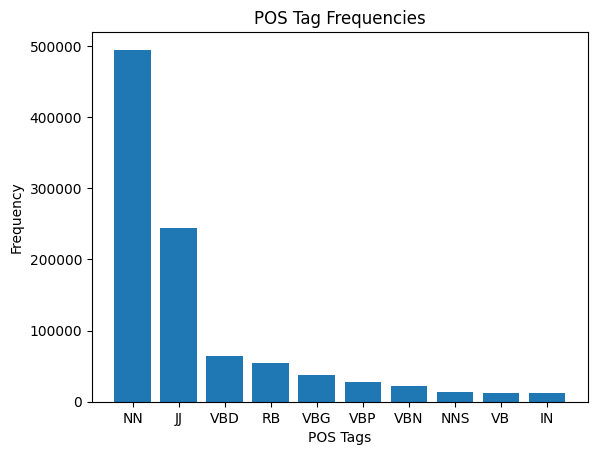

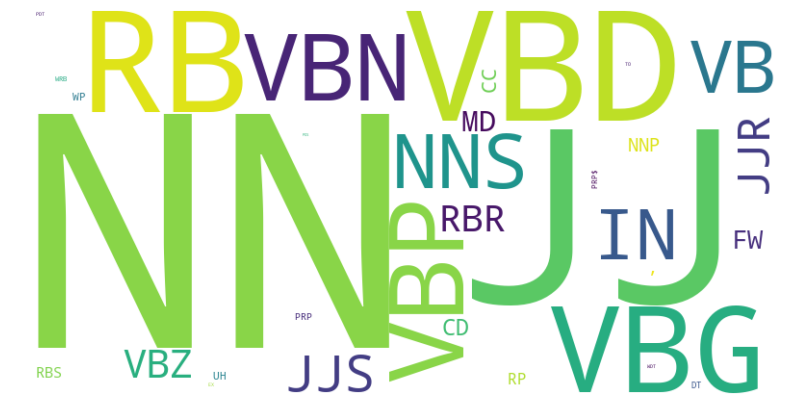

In [9]:
# Generate a bar chart for POS tag frequencies
pos, counts = zip(*most_common_pos)
plt.bar(pos, counts)
plt.xlabel('POS Tags')
plt.ylabel('Frequency')
plt.title('POS Tag Frequencies')
plt.show()

# Generate a word cloud for POS tags
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(pos_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<Axes: xlabel='Rating'>

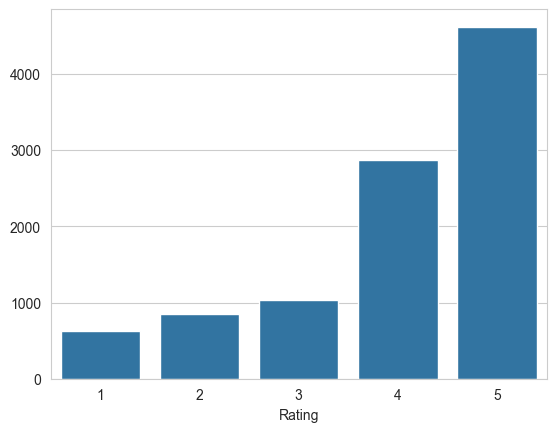

In [29]:
grouped = df.groupby('Rating')['Rating'].count()
grouped
sns.barplot(x = grouped.index, y = grouped.values)

In [27]:
df['words'] = [x.split() for x in df['Review']]
df['word_count'] = [len(x) for x in df['words']]
grouped_rating = df.groupby('Rating')['word_count'].mean()
grouped_rating

Rating
1    115.009615
2    130.490588
3    119.921283
4    110.393031
5     96.221910
Name: word_count, dtype: float64

<Axes: xlabel='Rating'>

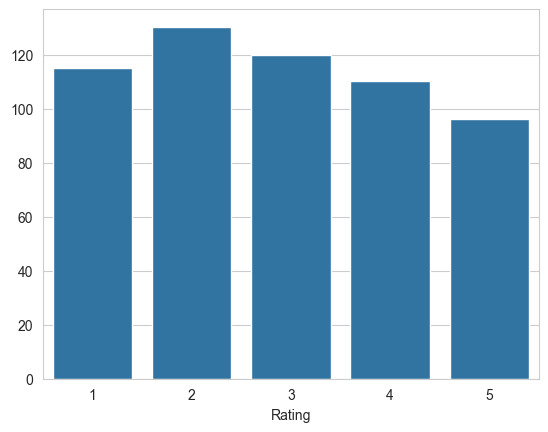

In [30]:
sns.barplot(x = grouped_rating.index, y = grouped_rating.values)

In [33]:
def new_rating(num):
    if (num == 1) or (num == 2):
        return 'poor'
    elif (num == 3) or (num == 4):
        return 'average'
    else:
        return 'excellent'

In [34]:
df['new_rating'] = df['Rating'].apply(new_rating)

In [35]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

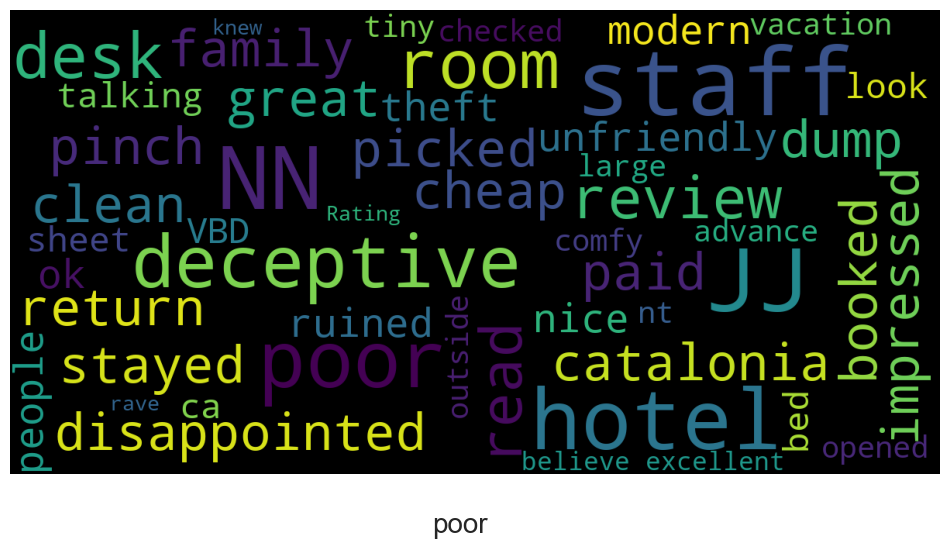

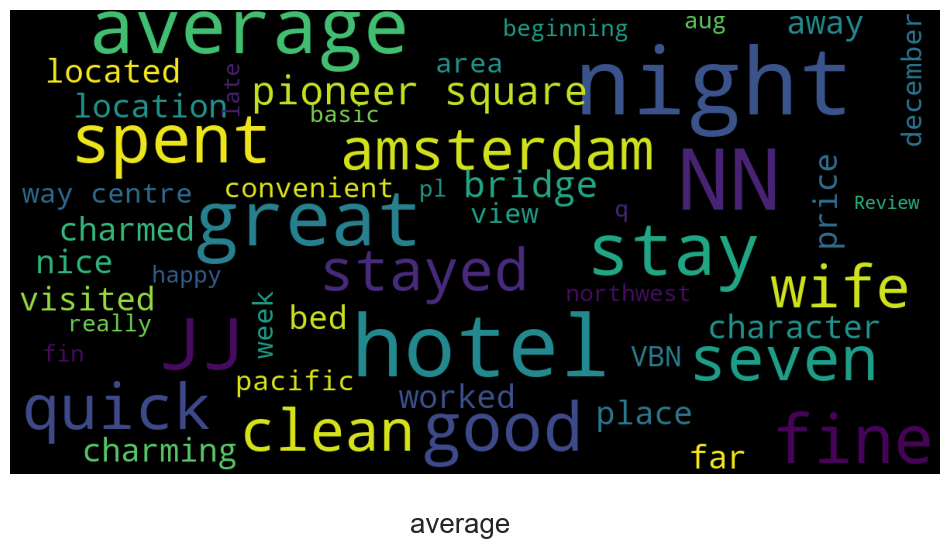

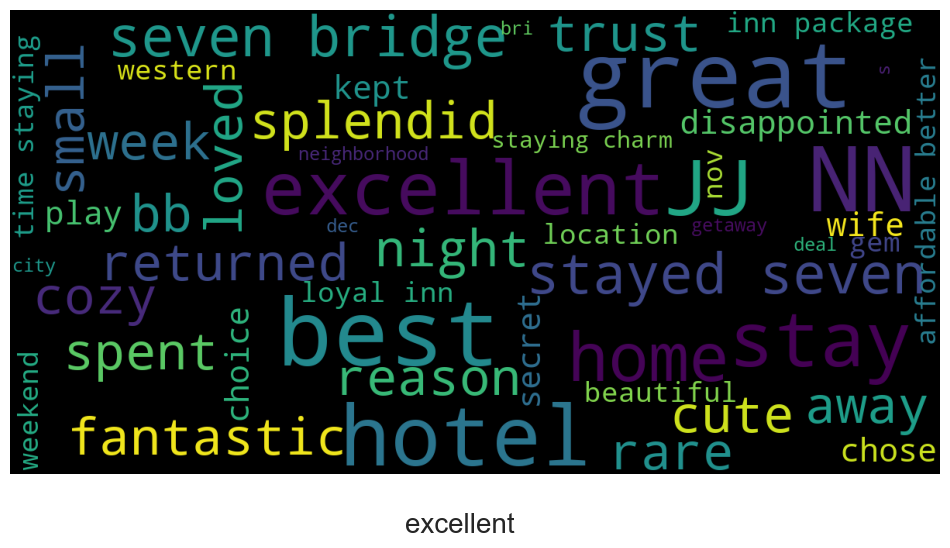

In [37]:
for rating in list(df['new_rating'].unique()):
    show_wordcloud(df[df['new_rating']==rating], title=rating)

### 4. Display the HMM POS tagging on the first 4 rows of the dataset

In [10]:
# Train an HMM POS tagger
trainer = hmm.HiddenMarkovModelTrainer()
tagged_sents = list(nltk.corpus.brown.tagged_sents(categories='news'))
hmm_tagger = trainer.train(tagged_sents[:5000])

# Apply HMM POS tagging to the first 4 rows
for review in df['cleaned_reviews'].head(4):
    words = word_tokenize(review)
    hmm_tags = hmm_tagger.tag(words)
    print(hmm_tags)

[('disappointed', 'AT'), ('picked', 'AT'), ('hotel', 'AT'), ('read', 'AT'), ('rave', 'AT'), ('review', 'AT'), ('tripadvisori', 'AT'), ('think', 'AT'), ('unluckly', 'AT'), ('particular', 'AT'), ('room', 'AT'), ('assigned', 'AT'), ('room', 'AT'), ('basement', 'AT'), ('level', 'AT'), ('maybe', 'AT'), ('room', 'AT'), ('nicer', 'AT'), ('experience', 'AT'), ('quite', 'AT'), ('disappointing', 'AT'), ('basement', 'AT'), ('room', 'AT'), ('reached', 'AT'), ('narrow', 'AT'), ('fairly', 'AT'), ('shabby', 'AT'), ('staircase', 'AT'), ('smell', 'AT'), ('damp', 'AT'), ('bedroom', 'AT'), ('warm', 'AT'), ('reasonably', 'AT'), ('spacious', 'AT'), ('comfortable', 'AT'), ('eclectic', 'AT'), ('mix', 'AT'), ('old', 'AT'), ('opposed', 'AT'), ('antique', 'AT'), ('furniture', 'AT'), ('bathroom', 'AT'), ('really', 'AT'), ('small', 'AT'), ('fair', 'AT'), ('told', 'AT'), ('advance', 'AT'), ('paint', 'AT'), ('peeling', 'AT'), ('shower', 'AT'), ('area', 'AT'), ('offputting', 'AT'), ('nt', 'AT'), ('bring', 'AT'), ('u

### 5. a) and b) Choose a subset of the dataset (e.g., a paragraph or a set of sentences) and apply both POS tagging and NER to this subset. 

In [13]:
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Choose a subset of the dataset (e.g., the first 100 reviews for demonstration)
subset_texts = df['cleaned_reviews'][:100]

# Initialize lists to store POS and NER results
pos_ner_set = set()

# Process each review in the subset
for text in subset_texts:
    doc = nlp(text)
    # Add POS and NER tags to the set for each token in the document
    pos_ner_set.update((token.text, token.pos_, token.ent_type_) for token in doc)

# Convert the set to a list and sort alphabetically by Word (token.text)
pos_ner_list_sorted = sorted(pos_ner_set, key=lambda x: x[0])

# Convert the sorted list to a DataFrame
pos_ner_df = pd.DataFrame(pos_ner_list_sorted, columns=['Word', 'POS Tag', 'NER Tag'])

# Convert the DataFrame to an HTML table
html_table = pos_ner_df.to_html(index=False)

# Display the HTML table
display(HTML(html_table))

Word,POS Tag,NER Tag
abbey,NOUN,PERSON
able,ADJ,
absolute,ADJ,
absolutely,ADV,
ac,PROPN,
academy,PROPN,ORG
academy,PROPN,
accept,VERB,
acceptable,ADJ,
accepted,VERB,


In [14]:
# Collect named entities into a list
named_entities = [(ent.text, ent.label_) for ent in doc.ents]

# Sort entities by text (alphabetically)
named_entities_sorted = sorted(named_entities, key=lambda x: x[0])

# Print sorted named entities
for text, label in named_entities_sorted:
    print(text, label)

night TIME
november DATE
paris GPE
paris GPE
year DATE


### 5.C POS (Part-of-Speech) tags and NER (Named Entity Recognition) tags are complementary in natural language processing, as they provide different levels of linguistic information that together contribute to a more complete understanding of text.

POS Tags:
POS tagging categorizes each word in a text into a specific syntactic category, such as noun, verb, adjective, adverb, etc. Some common POS tags include:

Nouns (NN, NNS, NNP, NNPS): Identify entities like people, places, things, and concepts.
Verbs (VB, VBD, VBG, VBN, VBP, VBZ): Describe actions, events, or states.
Adjectives (JJ, JJR, JJS): Modify or describe nouns.
Adverbs (RB, RBR, RBS): Modify verbs, adjectives, or other adverbs.
POS tags help in understanding the grammatical structure of sentences and how words relate to each other syntactically. For example, knowing that "book" is a noun and "read" is a verb helps in understanding that "book" is the object of the verb "read" in a sentence.

NER Tags:
NER tags identify and categorize named entities within text, such as names of persons, organizations, locations, dates, quantities, etc. Some common types of NER tags include:

PERSON: Names of people.
ORGANIZATION: Names of companies, institutions, etc.
LOCATION: Names of places.
DATE: Specific points or ranges in time.
MONEY: Monetary values.
NER tags help in identifying specific entities and understanding their roles and relationships within the text. For example, in the sentence "Jane Smith works at Google," NER tagging would identify "Jane Smith" as a PERSON and "Google" as an ORGANIZATION.

Complementary Roles:
Semantic Understanding: While POS tags provide structural information about the text, NER tags add semantic meaning by identifying important entities. Together, they give a more nuanced understanding of how words function within sentences and what specific entities are mentioned.

Contextual Understanding: POS tags help in disambiguating words based on their grammatical context (e.g., distinguishing between "lead" as a verb or a noun), while NER tags provide context-specific information about named entities (e.g., identifying whether "Paris" refers to a city or a person).

Information Extraction: POS tags aid in extracting grammatical relationships (e.g., subject-verb-object relationships), while NER tags facilitate the extraction of specific entities for tasks like information retrieval or summarization.

Improving NLP Models: Both POS and NER tags are used as features in many NLP tasks, such as machine translation, sentiment analysis, and question answering, to enhance model performance by providing structured linguistic and semantic information.

In summary, while POS tags focus on syntactic structure and grammatical relationships within sentences, NER tags highlight specific entities and their roles in text. Together, they provide a robust framework for understanding and processing natural language text in various NLP applications.